In [2]:
import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt
import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import sys
sys.path.append('../../')   # Add parent directory to Python path
from utils.Plots import *
RANDOM_SEED = 42


In [3]:
df = pd.read_csv('../../data/pocket/Accelerometer_data_combined_segmented.csv') 
# df.drop('Unnamed: 0', axis=1, inplace=True)
df

,curb_scene,start_time,end_time,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,2024-07-24 10:20:53.000,2024-07-24 10:20:53.497,7.359772,7.335831,7.311890,7.359772,7.354980,7.493851,7.445969,...,7.560883,7.498642,7.407654,7.398086,7.307098,7.264008,7.235275,7.149094,7.105988,7.005432
1,0.0,2024-07-24 10:20:53.501,2024-07-24 10:20:53.999,6.876144,6.766022,6.679825,6.574478,6.608002,6.603210,6.536163,...,6.967133,7.388504,8.011002,7.814682,7.316681,7.062897,7.077255,7.134720,7.192184,7.278366
2,0.0,2024-07-24 10:20:54.004,2024-07-24 10:20:54.496,7.776367,8.049301,8.293518,8.360550,8.207321,8.001419,7.867340,...,8.643066,8.657440,8.729263,8.743622,8.686157,8.599976,8.513779,8.422806,8.327026,8.255203
3,0.0,2024-07-24 10:20:54.501,2024-07-24 10:20:54.999,8.245636,8.274368,8.288727,8.360550,8.494629,8.729263,9.006989,...,9.112335,9.097961,9.155426,9.227249,9.294296,9.361328,9.390060,9.260773,9.107544,8.997406
4,0.0,2024-07-24 10:20:55.003,2024-07-24 10:20:55.495,8.815445,8.528152,8.240845,7.891296,7.517792,7.149094,6.967133,...,13.498505,12.253525,10.922348,9.581589,8.322250,7.216126,6.258438,5.420471,4.683060,4.046204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,1.0,2024-07-24 10:58:10.568,2024-07-24 10:58:10.954,3.725372,3.725372,3.055008,3.055008,1.800446,1.010361,0.727844,...,5.128387,5.128387,5.128387,5.128387,5.128387,5.128387,5.128387,5.128387,5.128387,5.128387
3696,1.0,2024-07-24 10:58:17.583,2024-07-24 10:58:17.993,3.529053,3.639191,3.739746,3.950439,4.228165,4.774033,4.898544,...,10.611099,10.611099,10.611099,10.611099,10.611099,10.611099,10.611099,10.611099,10.611099,10.611099
3697,1.0,2024-07-24 10:58:34.630,2024-07-24 10:58:34.995,-1.110916,-1.110916,-1.364700,-0.134079,-0.134079,2.394196,5.511459,...,6.871353,6.871353,6.871353,6.871353,6.871353,6.871353,6.871353,6.871353,6.871353,6.871353
3698,1.0,2024-07-24 10:59:18.534,2024-07-24 10:59:18.920,0.598557,0.598557,0.445328,0.105347,-0.474045,-0.474045,-1.369476,...,5.803543,5.803543,5.803543,5.803543,5.803543,5.803543,5.803543,5.803543,5.803543,5.803543


In [4]:
# 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()

curb_scene
0.0    3638
1.0      62
Name: count, dtype: int64

In [5]:
# Suppose df is your DataFrame, and df['curb_scene'] is your label column
train_data, test_data, train_labels, test_labels = train_test_split(df, df['curb_scene'], 
                                                                    test_size=0.2, 
                                                                    random_state=RANDOM_SEED)

# Now split the (train_data, train_labels) again into train and validation
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, 
                                                                  test_size=0.25, 
                                                                  random_state=RANDOM_SEED)


In [6]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit(train_data.iloc[:, 3:])
#transform data
train_data_scaled = scaler.transform(train_data.iloc[:, 3:])
val_data_scaled = scaler.transform(val_data.iloc[:, 3:])
test_data_scaled = scaler.transform(test_data.iloc[:, 3:])
print(train_data_scaled.shape)
print(val_data_scaled.shape)
print(test_data_scaled.shape)


(2220, 100)
(740, 100)
(740, 100)


In [7]:
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns[3:])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns[3:])
val_data_scaled_df = pd.DataFrame(val_data_scaled, columns=val_data.columns[3:])
# Add the 'curb_scene', 'start_time', and 'end_time' columns back to the scaled DataFrames
train_data_scaled_df['curb_scene'] = train_data['curb_scene'].values
train_data_scaled_df['start_time'] = train_data['start_time'].values
train_data_scaled_df['end_time'] = train_data['end_time'].values
test_data_scaled_df['curb_scene'] = test_data['curb_scene'].values
test_data_scaled_df['start_time'] = test_data['start_time'].values
test_data_scaled_df['end_time'] = test_data['end_time'].values
val_data_scaled_df['curb_scene'] = val_data['curb_scene'].values
val_data_scaled_df['start_time'] = val_data['start_time'].values
val_data_scaled_df['end_time'] = val_data['end_time'].values

In [8]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].values[:, :-3]
abnormal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].values[:, :-3]
normal_val_data_scaled = val_data_scaled_df[val_data_scaled_df['curb_scene'] == 0.0].values[:, :-3]
abnormal_val_data_scaled = val_data_scaled_df[val_data_scaled_df['curb_scene'] == 1.0].values[:, :-3]
val_data_scaled = val_data_scaled_df.values[:, :-3]
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].values[:, :-3]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].values[:, :-3]

In [9]:
# Cast to float32
normal_train_data_scaled = normal_train_data_scaled.astype("float32")
abnormal_train_data_scaled = abnormal_train_data_scaled.astype("float32")
normal_val_data_scaled = normal_val_data_scaled.astype("float32")
abnormal_val_data_scaled = abnormal_val_data_scaled.astype("float32")
val_data_scaled = val_data_scaled.astype("float32")
normal_test_data_scaled = normal_test_data_scaled.astype("float32")
abnormal_test_data_scaled = abnormal_test_data_scaled.astype("float32")
print(normal_train_data_scaled.dtype)

float32


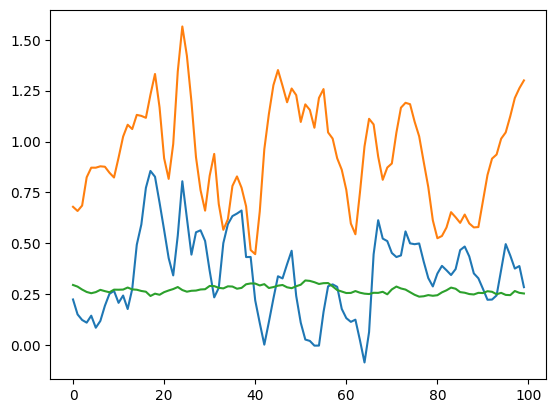

In [10]:
#See normal data ecg
plt.plot(normal_train_data_scaled[0])
plt.plot(normal_train_data_scaled[500])
plt.plot(normal_train_data_scaled[600])

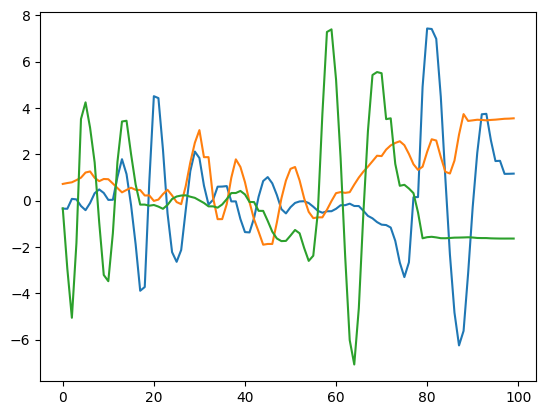

In [11]:
# #see abnormal data
plt.plot(abnormal_train_data_scaled[10])
plt.plot(abnormal_train_data_scaled[20])
plt.plot(abnormal_train_data_scaled[30])

In [13]:
#Allow me to use data in different ways
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(8, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(100, activation='sigmoid')
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        #returns me a decoder object
        return decoded

In [14]:
#define model
model = AutoEncoder()
#if in 2 Epochs, loss is not decreasing, stop the training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')
model.compile(optimizer='adam', loss='mae')

In [15]:
# seprate class as well for normal and abnormal data invalidation data
history = model.fit(normal_train_data_scaled, normal_train_data_scaled,epochs=100, batch_size=128,
                    validation_data=(val_data_scaled, val_data_scaled), 
                    shuffle=True, callbacks=[early_stopping])

# Save the entire model to a file
model.save("../../models/autoencoder_pocket.h5")

# load später
# from tensorflow.keras.models import load_model
# model = load_model("../../models/autoencoder_handlebar.h5")

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.8550 - val_loss: 0.8807
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8300 - val_loss: 0.7526
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6734 - val_loss: 0.6453
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5804 - val_loss: 0.6188
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5866 - val_loss: 0.6153
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5636 - val_loss: 0.6127
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5647 - val_loss: 0.6159
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5644 - val_loss: 0.6176


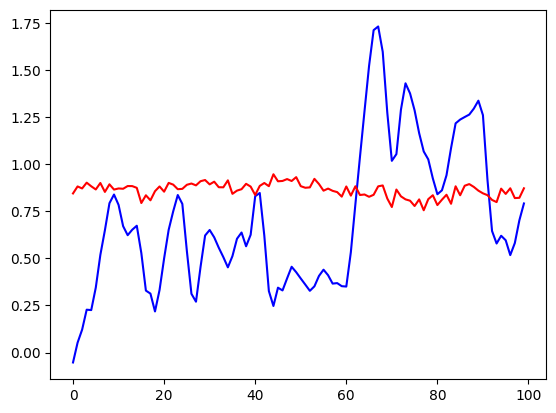

In [16]:
#normal data
#Encoder is bottleneck of 8 Units, decoder is reconstructed output of 100 units
encoder_out = model.encoder(normal_test_data_scaled).numpy()
decoder_out = model.decoder(encoder_out).numpy()
plt.plot(normal_test_data_scaled[0], 'blue')
plt.plot(decoder_out[0], 'red')

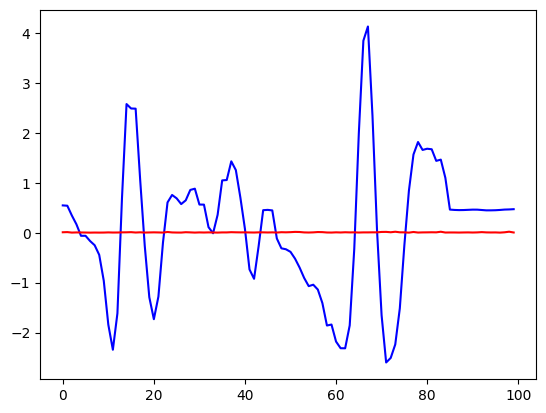

In [17]:
# abnormal data
encoder_out_abnormal = model.encoder(abnormal_test_data_scaled).numpy()
decoder_out_abnormal = model.decoder(encoder_out_abnormal).numpy()
plt.plot(abnormal_test_data_scaled[2], 'blue')
plt.plot(decoder_out_abnormal[2], 'red')

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


(array([58., 55., 92., 95., 88., 43., 27., 24., 15., 19.,  8.,  7.,  3.,
         5., 10.,  4.,  3.,  7.,  4., 16., 11., 11.,  6., 13.,  7., 21.,
        30.,  9.,  4., 12., 12.,  0.,  3.,  5.,  2.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.05050659, 0.10853901, 0.16657142, 0.22460383, 0.28263626,
        0.34066868, 0.39870107, 0.45673349, 0.51476592, 0.57279831,
        0.63083076, 0.68886316, 0.74689555, 0.804928  , 0.8629604 ,
        0.92099285, 0.97902524, 1.03705764, 1.09509003, 1.15312254,
        1.21115494, 1.26918733, 1.32721972, 1.38525212, 1.44328451,
        1.50131702, 1.55934942, 1.61738181, 1.6754142 , 1.7334466 ,
        1.79147911, 1.8495115 , 1.9075439 , 1.96557629, 2.02360868,
        2.0816412 , 2.13967347, 2.19770598, 2.2557385 , 2.31377077,
        2.37180328, 2.42983556, 2.48786807, 2.54590058, 2.60393286,
        2.66196537, 2.71999764, 2.77803016, 2.83606243, 2.89409494,
        2.95212746]),
 <BarContainer

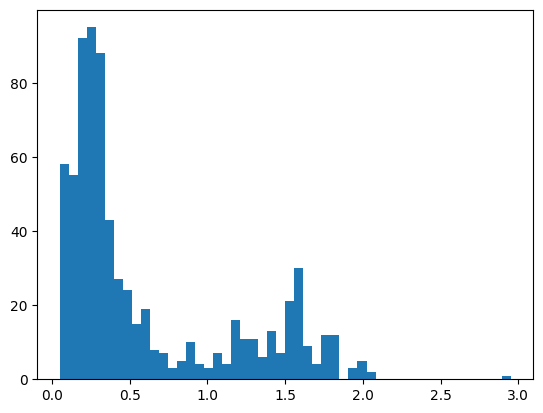

In [18]:
reconstruction = model.predict(normal_test_data_scaled)    #output error between input and output
train_loss = tf.keras.losses.mae(reconstruction, normal_test_data_scaled)
plt.hist(train_loss, bins=50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


(array([1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.]),
 array([0.44088185, 0.4563756 , 0.47186935, 0.4873631 , 0.50285685,
        0.5183506 , 0.53384435, 0.5493381 , 0.56483185, 0.5803256 ,
        0.59581935, 0.6113131 , 0.62680686, 0.64230061, 0.65779442,
        0.67328817, 0.68878192, 0.70427567, 0.71976942, 0.73526317,
        0.75075692, 0.76625067, 0.78174442, 0.79723817, 0.81273192,
        0.82822567, 0.84371942, 0.85921323, 0.87470698, 0.89020073,
        0.90569448, 0.92118824, 0.93668199, 0.95217574, 0.96766949,
        0.98316324, 0.99865699, 1.01415074, 1.02964449, 1.04513824,
        1.06063199, 1.07612574, 1.09161949, 1.10711324, 1.12260699,
        1.13810074, 1.15359449, 1.16908824, 1.184582  , 1.20007575,
        1.2155695 ]),
 <BarContainer object of 50 artists>)

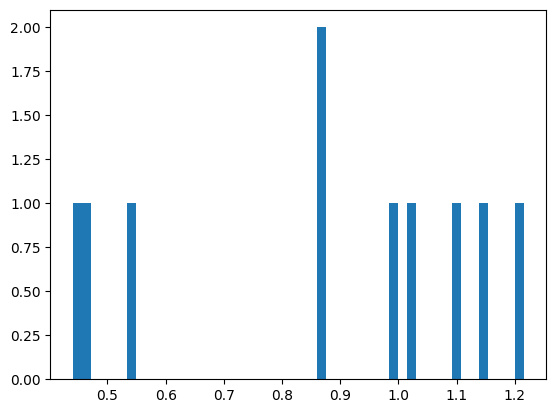

In [19]:
reconstruction_abnormal = model.predict(abnormal_test_data_scaled)
train_loss_abnormal = tf.keras.losses.mae(reconstruction_abnormal, abnormal_test_data_scaled)
plt.hist(train_loss_abnormal, bins=50)

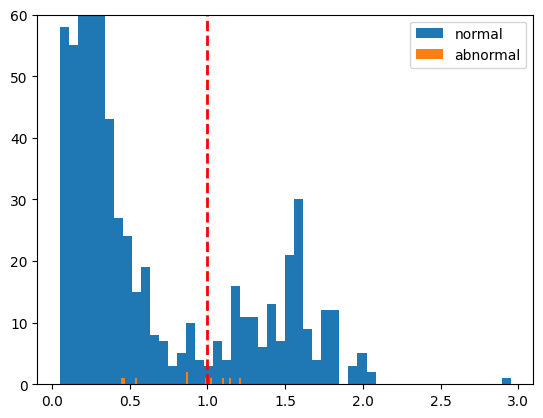

In [20]:
threadshold = 1
plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_abnormal, bins=50, label='abnormal')
plt.ylim(0, 60)
plt.legend()
plt.axvline(threadshold, color='r', linestyle='dashed', linewidth=2,label = '{:0.3f}'.format(threadshold))
plt.show()

In [21]:
preds=tf.math.less(train_loss, threadshold)
correct = tf.math.count_nonzero(preds)
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds))

Correct Predictions:  554
Accuracy:  0.7589041095890411


In [22]:
preds_abnormal=tf.math.greater(train_loss_abnormal, threadshold)
correct = tf.math.count_nonzero(preds_abnormal)
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_abnormal))

Correct Predictions:  4
Accuracy:  0.4
